In [1]:
import os
print(os.getcwd())
os.chdir('d:\\vscode_machineLearning\\internship\\Customer-Churn-Prediction')
print(os.getcwd())

d:\vscode_machineLearning\internship\Customer-Churn-Prediction\experiments\EDA
d:\vscode_machineLearning\internship\Customer-Churn-Prediction


In [14]:
import pandas as pd
from ensure import ensure_annotations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv(r'artifacts/raw_data/customer_churn_removed_col.csv')

In [16]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


### all numerical columns distribution

In [17]:
cat_cols =[feature for feature in df.columns if df[feature].dtype == 'O']
num_cols =[feature for feature in df.columns if df[feature].dtype != 'O']
print(cat_cols)
print(num_cols)

['Gender', 'Location']
['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']


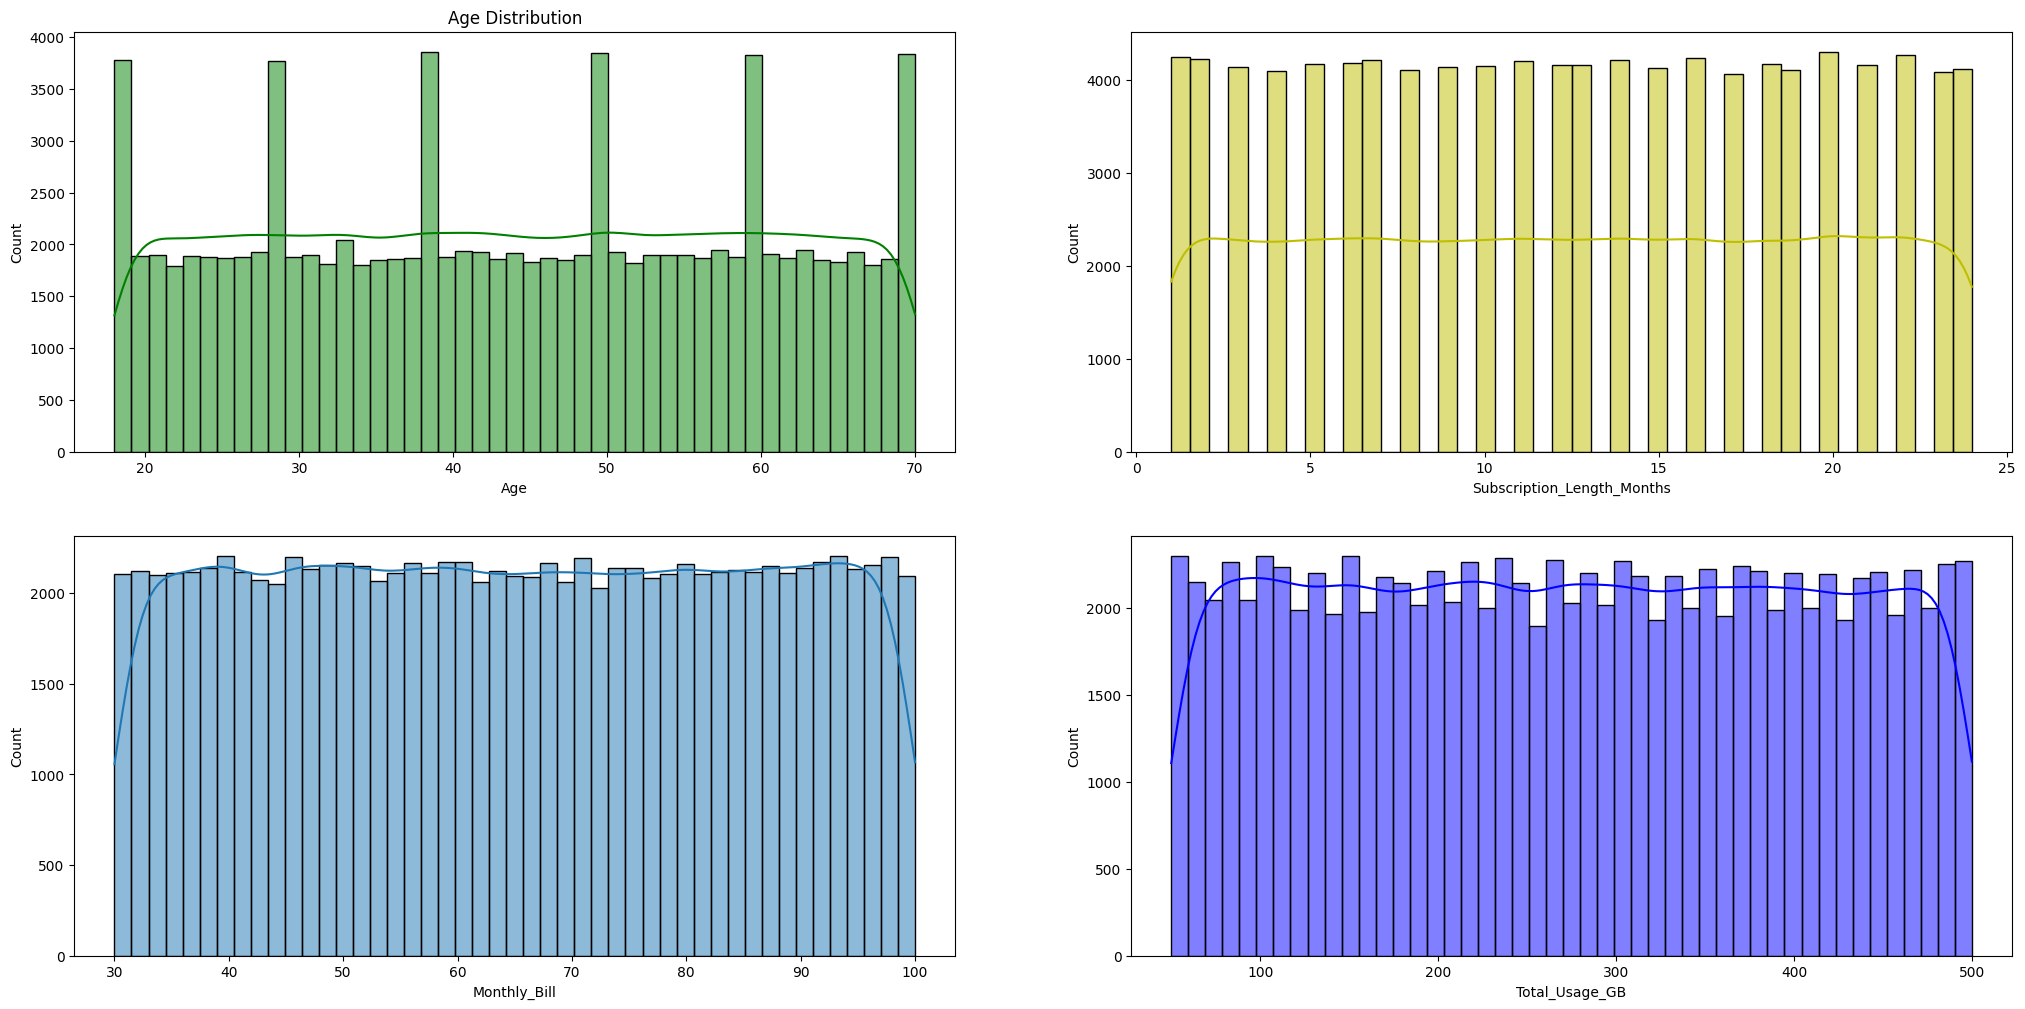

In [18]:
plt.subplots(nrows=2,ncols=2,figsize = (25,12))
plt.subplot(2,2,1)
ax = sns.histplot(data=df[num_cols]['Age'],kde=True,color='g')
# for i in ax.containers:
#     ax.bar_label(i)
plt.title('Age Distribution')
plt.subplot(2,2,2)
ax = sns.histplot(data=df[num_cols]['Subscription_Length_Months'],kde=True,color='y')
# for i in ax.containers:
#     ax.bar_label(i)
plt.subplot(2,2,3)
sns.histplot(data=df[num_cols]['Monthly_Bill'],kde=True)
plt.subplot(2,2,4)
ax = sns.histplot(data=df[num_cols]['Total_Usage_GB'],kde=True,color='b')
# for i in ax.containers:
#     ax.bar_label(i)

### Comparing all with `Churn`

In [19]:
num_cols

['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

In [20]:
cat_cols

['Gender', 'Location']

Gender
Female    50216
Name: count, dtype: int64

Location
Houston    20157
Name: count, dtype: int64

Churn
0    50221
Name: count, dtype: int64



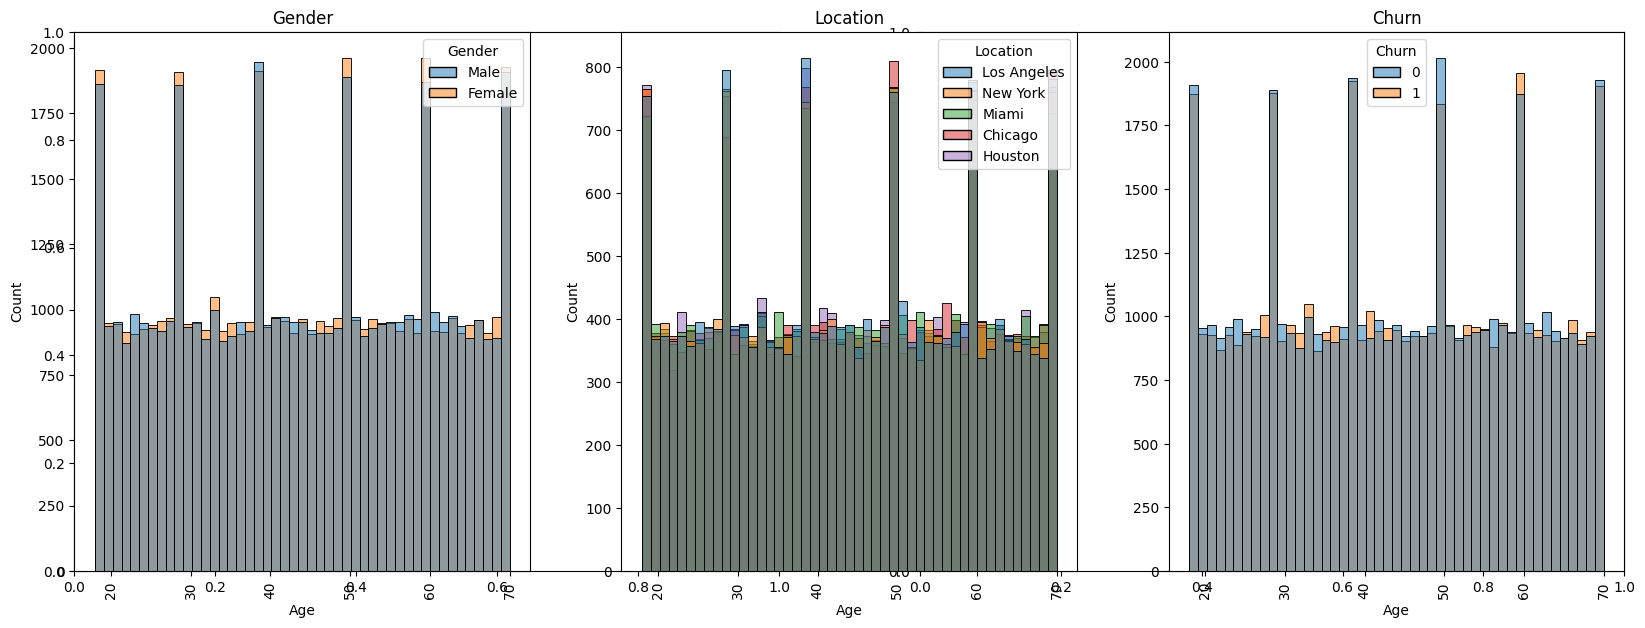

In [24]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Age'],color='g',hue='Gender',)
plt.title('Gender')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Age'],color='y',hue='Location')
plt.xticks(rotation = 'vertical')
plt.title(label='Location')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Age'],hue=df['Churn'])
plt.title('Churn',)
plt.xticks(rotation = 'vertical')

print(f'{df["Gender"].value_counts().head(1)}') 
print('')
print(f'{df["Location"].value_counts().head(1)}') 
print('')
print(f'{df["Churn"].value_counts().head(1)}') 
print('')


(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

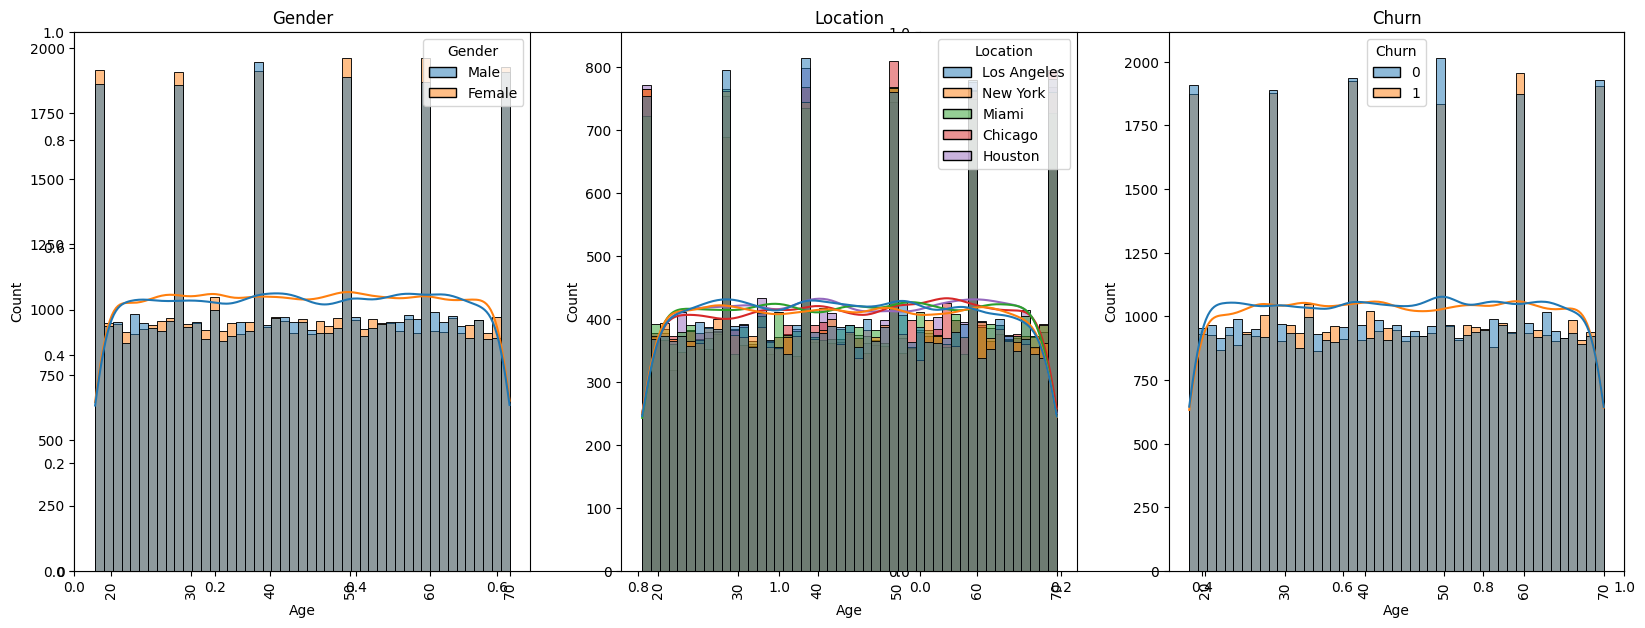

In [28]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Age'],color='g',hue='Gender',kde=True)
plt.title('Gender')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Age'],kde=True,color='y',hue='Location')
plt.xticks(rotation = 'vertical')
plt.title(label='Location')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Age'],kde=True,hue=df['Churn'])
plt.title('Churn',)
plt.xticks(rotation = 'vertical')



## Insights
with respect to age the data is equally distributed.

In [29]:
num_cols

['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

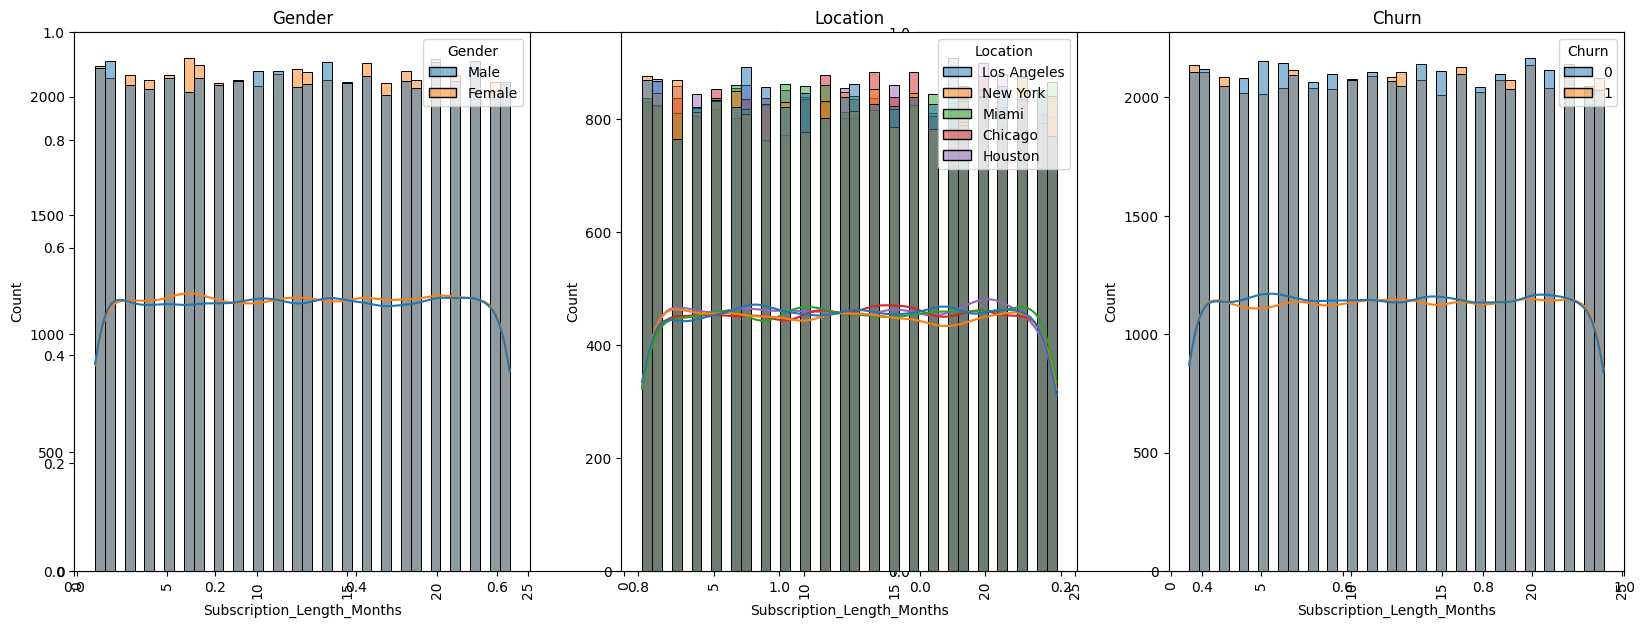

In [30]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Subscription_Length_Months'],color='g',hue='Gender',kde=True)
plt.title('Gender')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Subscription_Length_Months'],kde=True,color='y',hue='Location')
plt.xticks(rotation = 'vertical')
plt.title(label='Location')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Subscription_Length_Months'],kde=True,hue=df['Churn'])
plt.title('Churn',)
plt.xticks(rotation = 'vertical')



## Insights
with respect to Subscription_Length_Months also the data is equally distributed.

(array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100'),
  Text(110.0, 0, '110')])

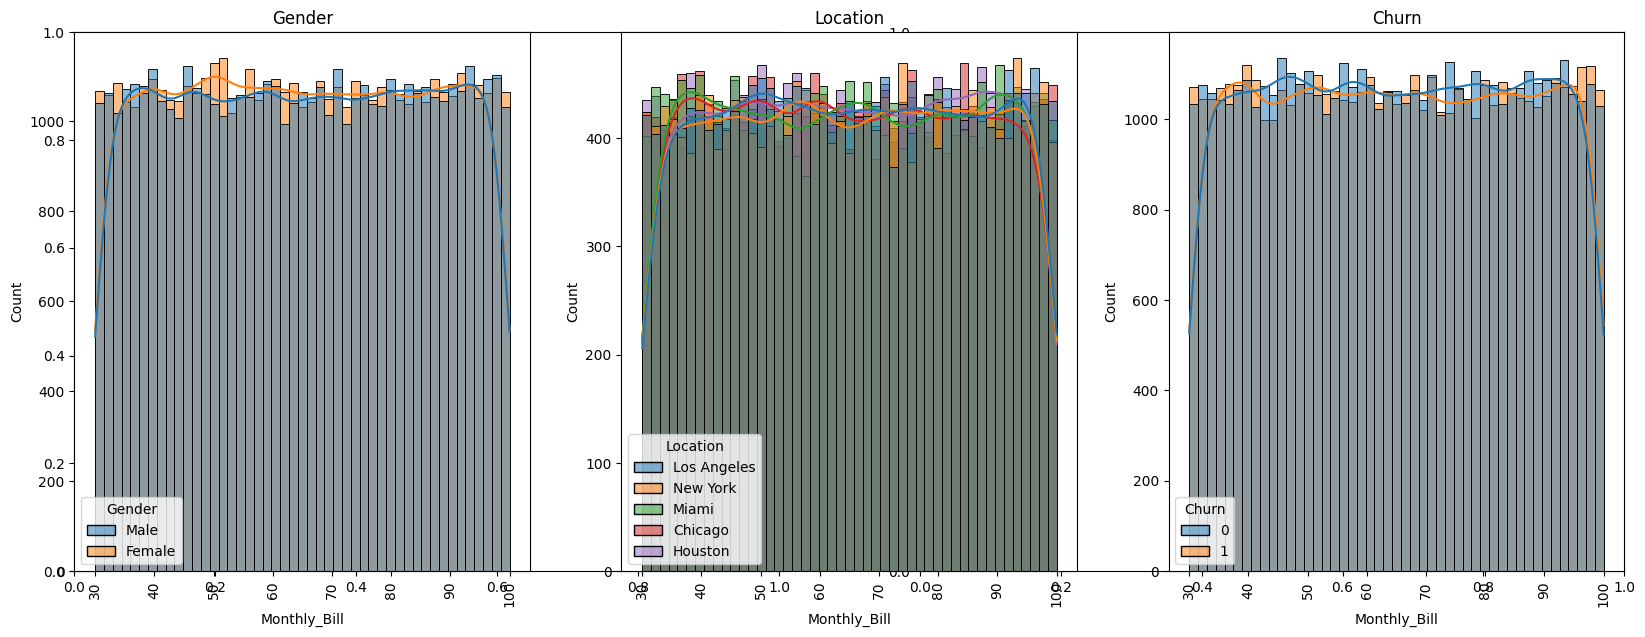

In [31]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Monthly_Bill'],color='g',hue='Gender',kde=True)
plt.title('Gender')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Monthly_Bill'],kde=True,color='y',hue='Location')
plt.xticks(rotation = 'vertical')
plt.title(label='Location')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Monthly_Bill'],kde=True,hue=df['Churn'])
plt.title('Churn',)
plt.xticks(rotation = 'vertical')


## Insights
There's not any much difference with respect to `Monthly_Bill` also.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

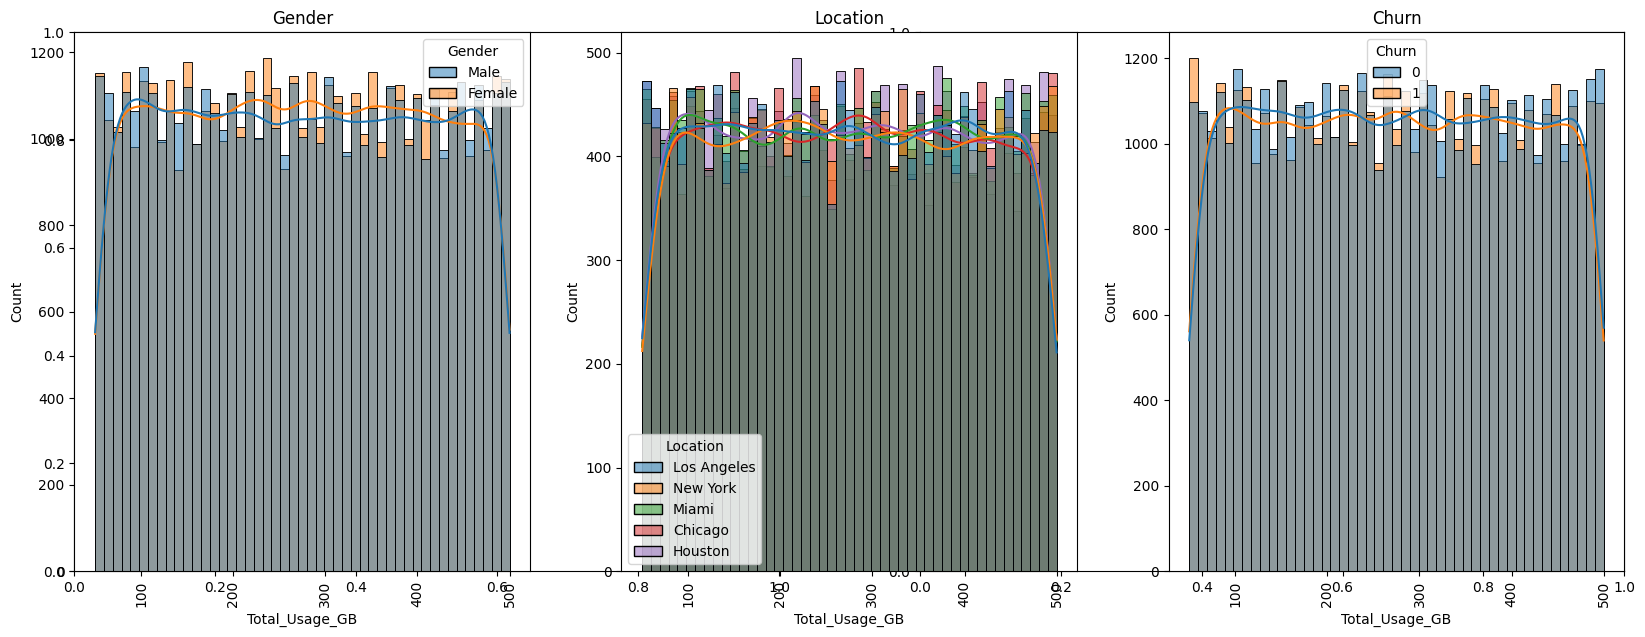

In [32]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Total_Usage_GB'],color='g',hue='Gender',kde=True)
plt.title('Gender')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Total_Usage_GB'],kde=True,color='y',hue='Location')
plt.xticks(rotation = 'vertical')
plt.title(label='Location')

plt.subplot(1,3,3)
sns.histplot(data=df,x=df['Total_Usage_GB'],kde=True,hue=df['Churn'])
plt.title('Churn',)
plt.xticks(rotation = 'vertical')


## Same Here.

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

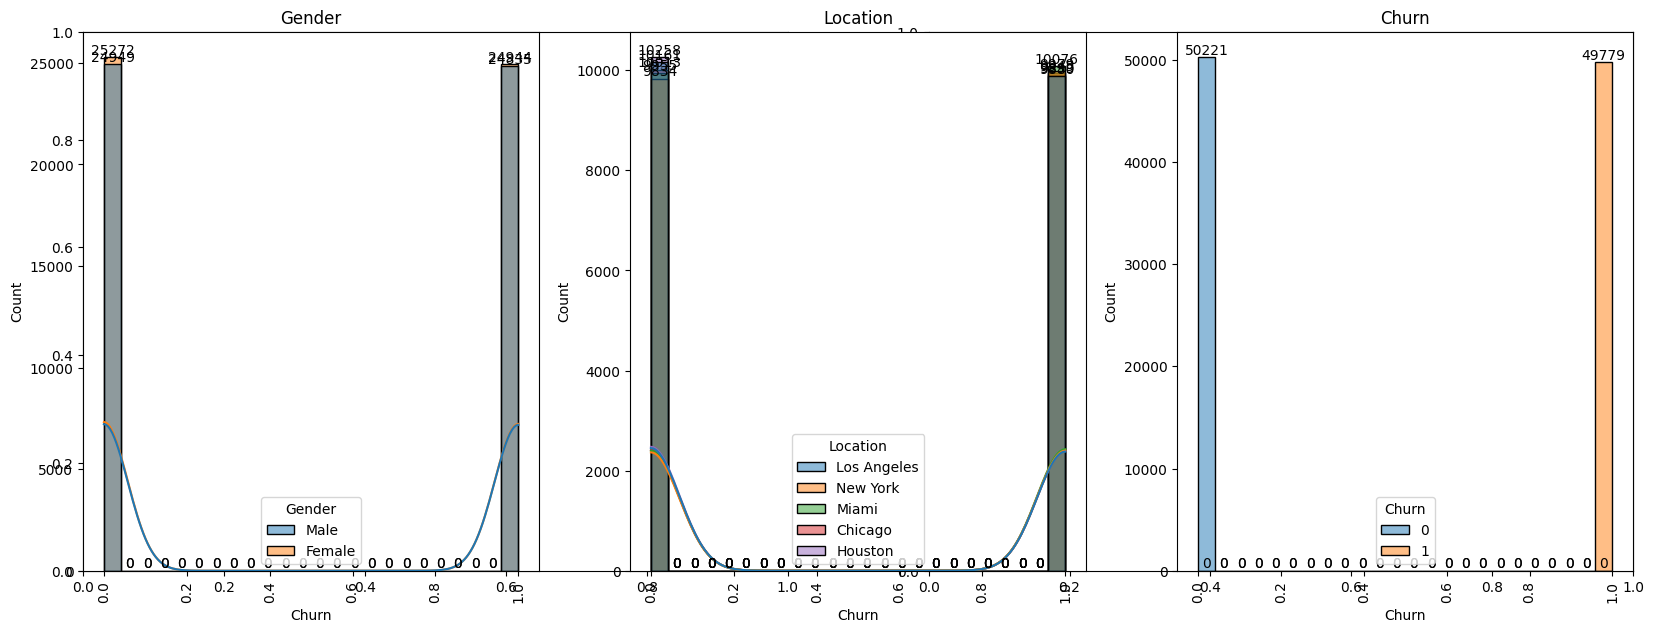

In [35]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))

plt.subplot(1,3,1)
ax = sns.histplot(data=df,x=df['Churn'],color='g',hue='Gender',kde=True)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Gender')
plt.xticks(rotation = 'vertical')

plt.subplot(1,3,2)
ax = sns.histplot(data=df,x=df['Churn'],kde=True,color='y',hue='Location')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 'vertical')
plt.title(label='Location')

plt.subplot(1,3,3)
ax = sns.histplot(data=df,x=df['Churn'],kde=True,hue=df['Churn'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Churn',)
plt.xticks(rotation = 'vertical')


## theres not that much difference

## Insight
Almost equal distribution of all classes

## Multivariate analysis using pieplot

In [44]:
df['Location'].value_counts().index.tolist()

['Houston', 'Los Angeles', 'Miami', 'Chicago', 'New York']

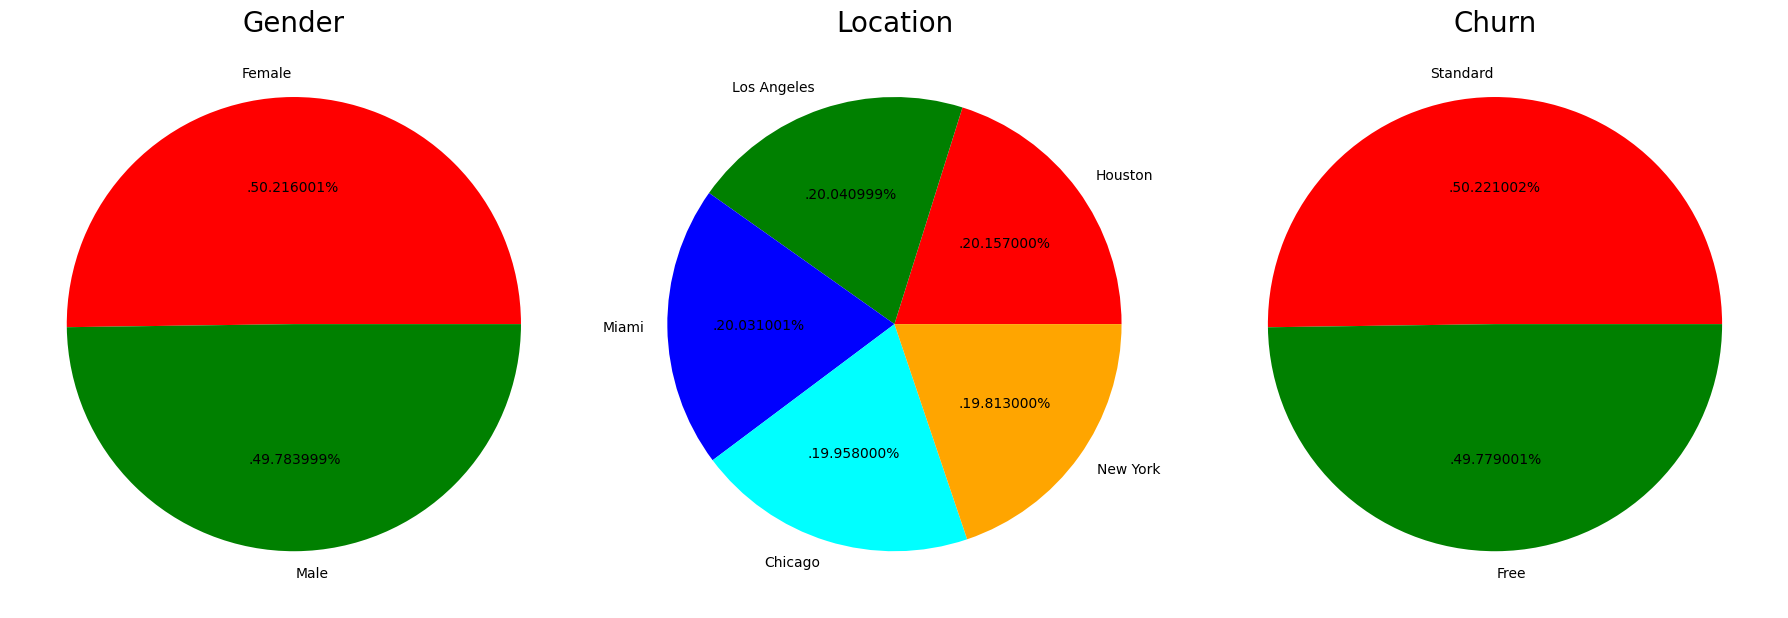

In [46]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Location'].value_counts()
labels = 'Houston', 'Los Angeles', 'Miami', 'Chicago', 'New York'
color = ['red', 'green', 'blue', 'cyan','orange','pink']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Location', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['Churn'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Churn', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


## Almost equally distribution of each class in each feature.

# Correlation

<Axes: >

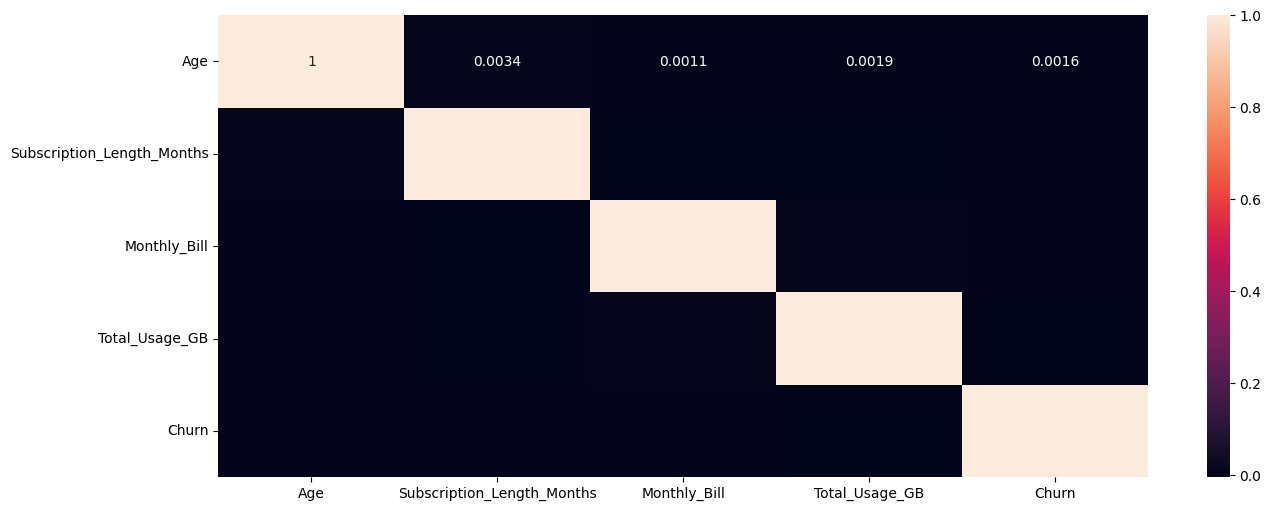

In [47]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df[num_cols].corr(),annot=True)

## not correlated

## Num columns correlation

In [48]:
num_cols

['Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Churn']

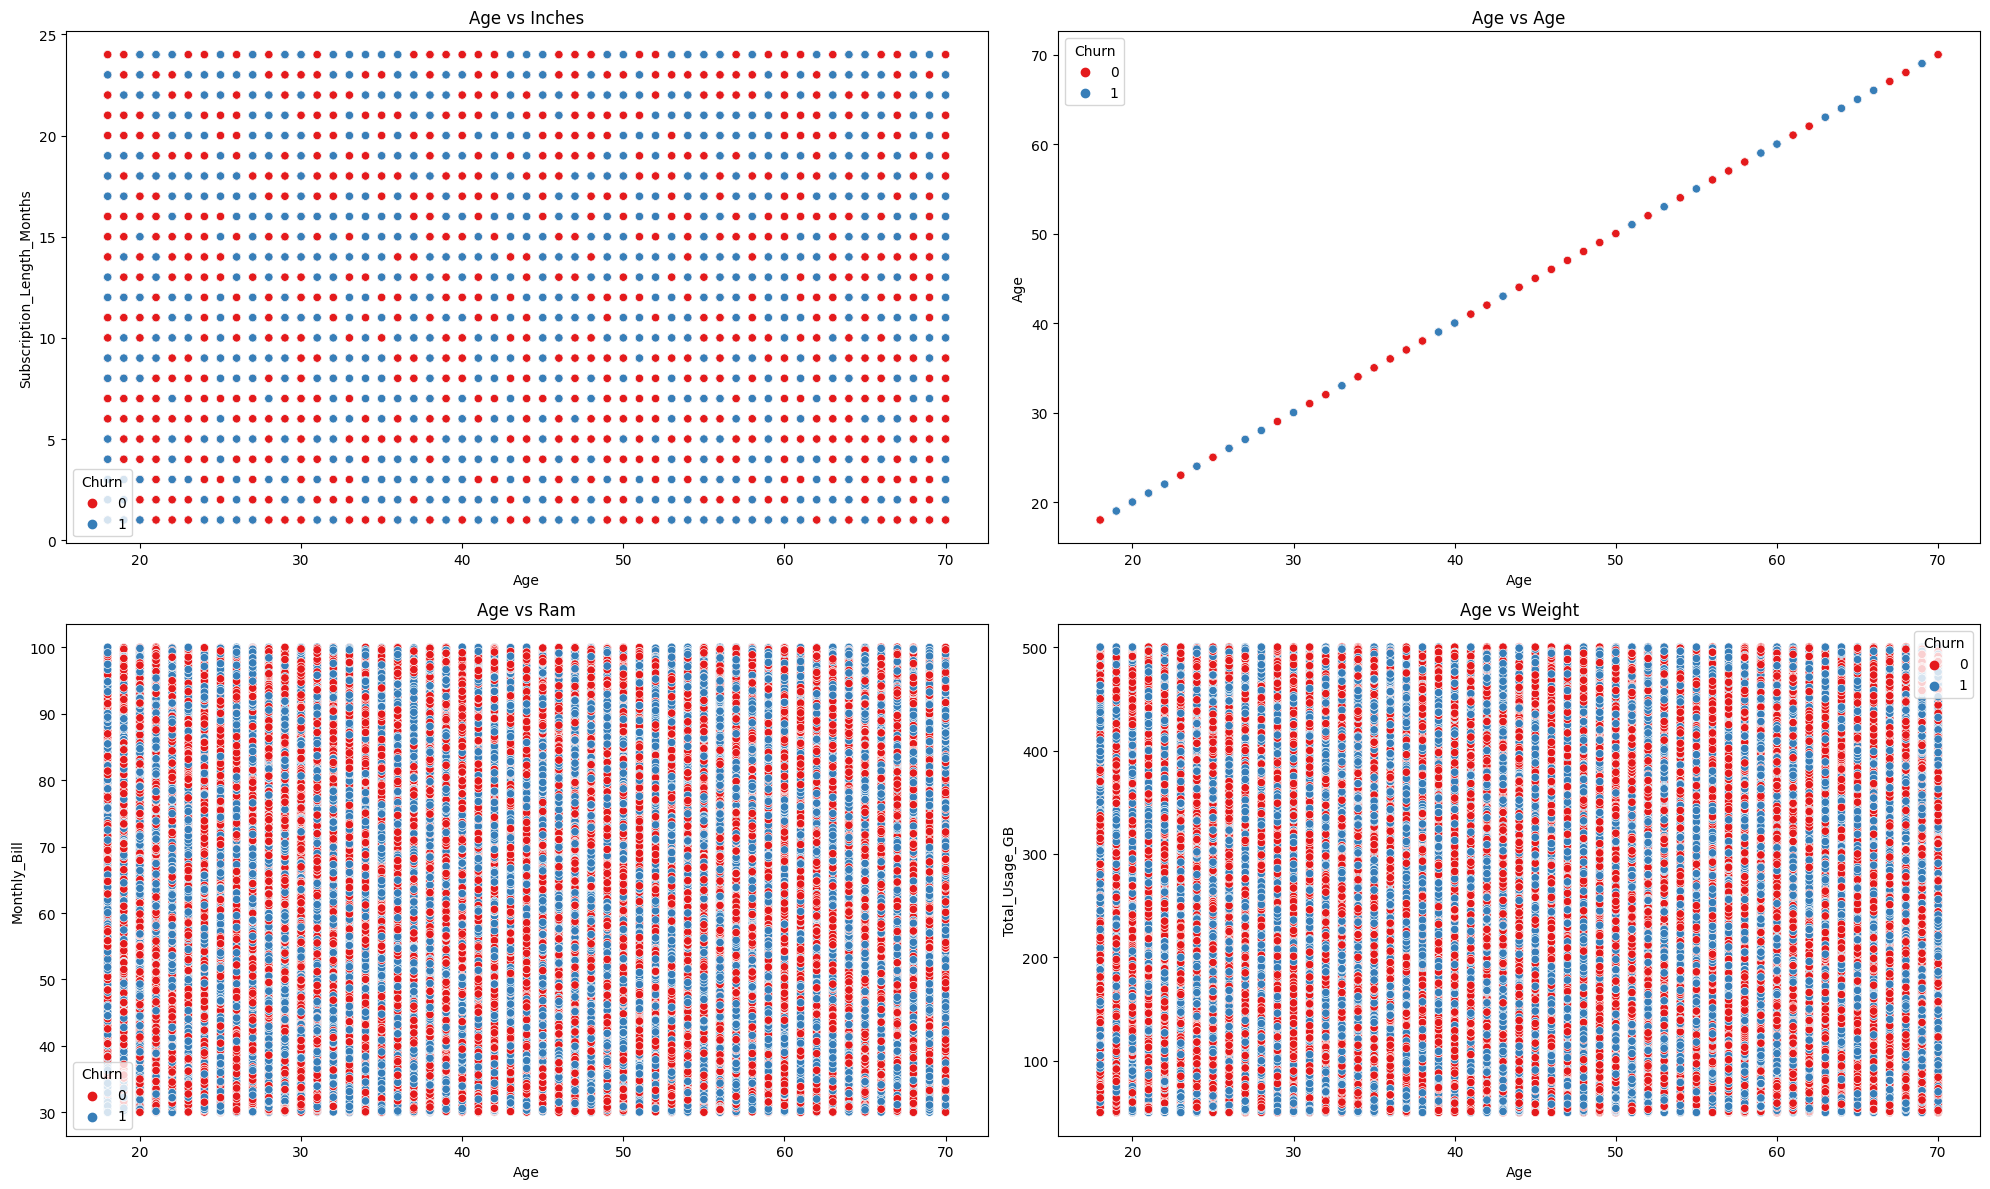

In [49]:
plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

plt.subplot(2, 2, 1)
ax = sns.scatterplot(data=df[num_cols], x='Age', y='Subscription_Length_Months', hue=df['Churn'], palette='Set1')
plt.title('Age vs Inches')

plt.subplot(2, 2, 2)
ax = sns.scatterplot(data=df[num_cols], x='Age', y='Age', hue=df['Churn'], palette='Set1')
plt.title('Age vs Age')

plt.subplot(2, 2, 3)
ax = sns.scatterplot(data=df[num_cols], x='Age', y='Monthly_Bill', hue=df['Churn'], palette='Set1')
plt.title('Age vs Ram')

plt.subplot(2, 2, 4)
ax = sns.scatterplot(data=df[num_cols], x='Age', y='Total_Usage_GB', hue=df['Churn'], palette='Set1')
plt.title('Age vs Weight')

plt.tight_layout()
plt.show()


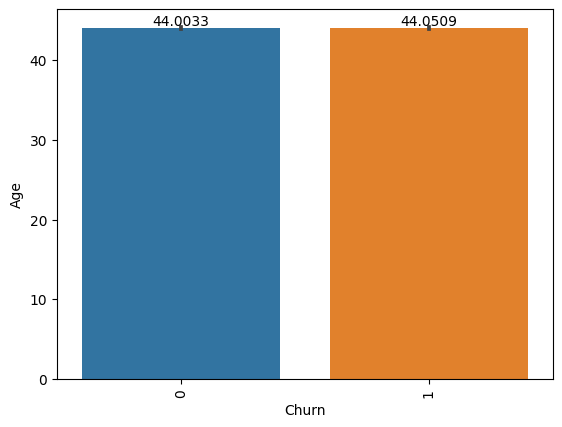